<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_3/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import math, random
import matplotlib.pyplot as plt
from scipy import signal
from random import randrange
from numpy import random

In [114]:
timePoints = np.linspace(0, 1, 1000)

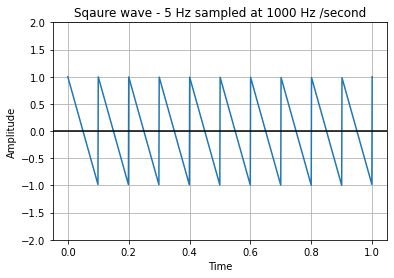

In [115]:
SAWTOOTH = signal.sawtooth(-2 * np.pi * 10 * timePoints  - 0.0004)
plt.plot(timePoints, SAWTOOTH )
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

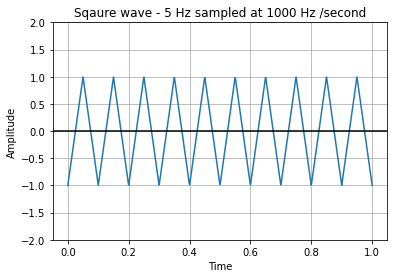

In [117]:
TRIANGLE = signal.sawtooth(2 * np.pi * 10 * timePoints, 0.5)
plt.plot(timePoints, TRIANGLE)
plt.title('Sqaure wave - 5 Hz sampled at 1000 Hz /second')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

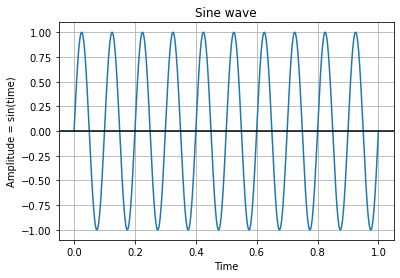

In [118]:
SINE   = np.sin(2 * np.pi *10* timePoints)
plt.plot(timePoints, SINE)
plt.title('Sine wave') 
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)') 
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
# Display the sine wave

In [119]:
def create_random_amplitude():
  return np.random.uniform(3 , 6  )

In [125]:
def make_noisy(Y, noise_range=(-0.35, 0.35)):
    noise = np.zeros(Y.shape)
    if randrange(2) == 0 :
      noise = np.random.uniform(noise_range[0], noise_range[1], size=Y.shape)
    else:
      nois = np.random.normal(0,1,Y.shape)
    return Y + noise

In [165]:
TRIANGLE_out = np.zeros( (500,1000))
SAWTOOTH_out = np.zeros( (500,1000))
SINE_out = np.zeros((500,1000))
TRIANGLE_dataset = np.zeros( (500,1000))
SAWTOOTH_dataset = np.zeros( (500,1000))
SINE_dataset = np.zeros((500,1000))
for i in range(500):
  SINE_out[i] = SINE
  TRIANGLE_out[i] = TRIANGLE
  SAWTOOTH_out[i] = SAWTOOTH
  
  SINE_dataset[i] = make_noisy (SINE)
  SAWTOOTH_dataset[i] = make_noisy (SAWTOOTH)
  TRIANGLE_dataset[i] = make_noisy (TRIANGLE)

In [166]:
TRIANGLE_train , TRIANGLE_validation , TRIANGLE_test = TRIANGLE_dataset[:700]   , TRIANGLE_dataset[700:800]  , TRIANGLE_dataset[800:] 
SAWTOOTH_train , SAWTOOTH_validation , SAWTOOTH_test = SAWTOOTH_dataset[:700]   , SAWTOOTH_dataset[700:800]  , SAWTOOTH_dataset[800:] 
SINE_train , SINE_validation , SINE_test = SINE_dataset[:700]   , SINE_dataset[700:800]  , SINE_dataset[800:] 

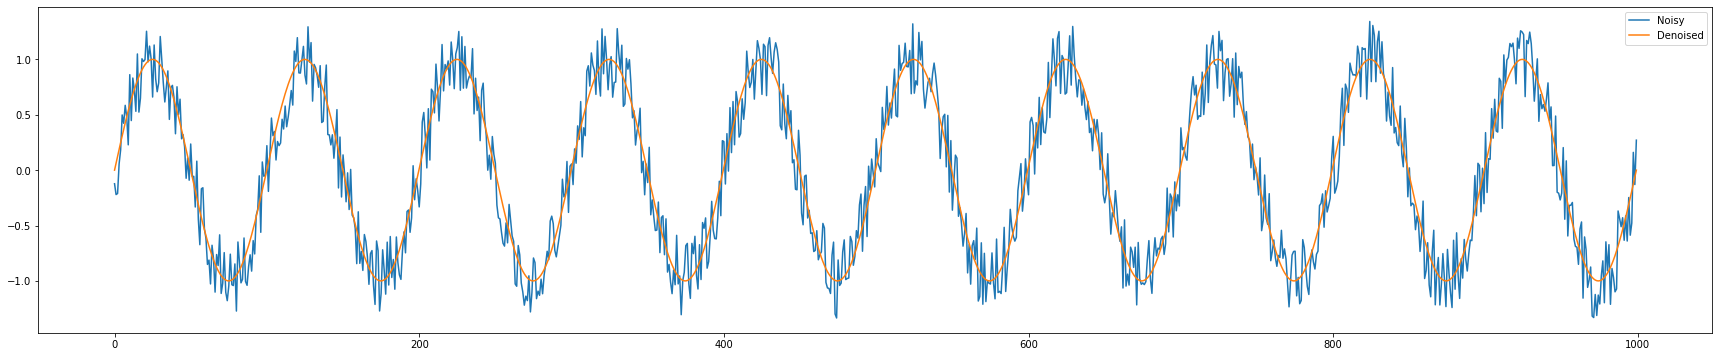

In [141]:
plt.figure(figsize = (30,6))
plt.plot( make_noisy(SINE), label='Noisy')
plt.plot(SINE, label ='Denoised')
plt.legend()

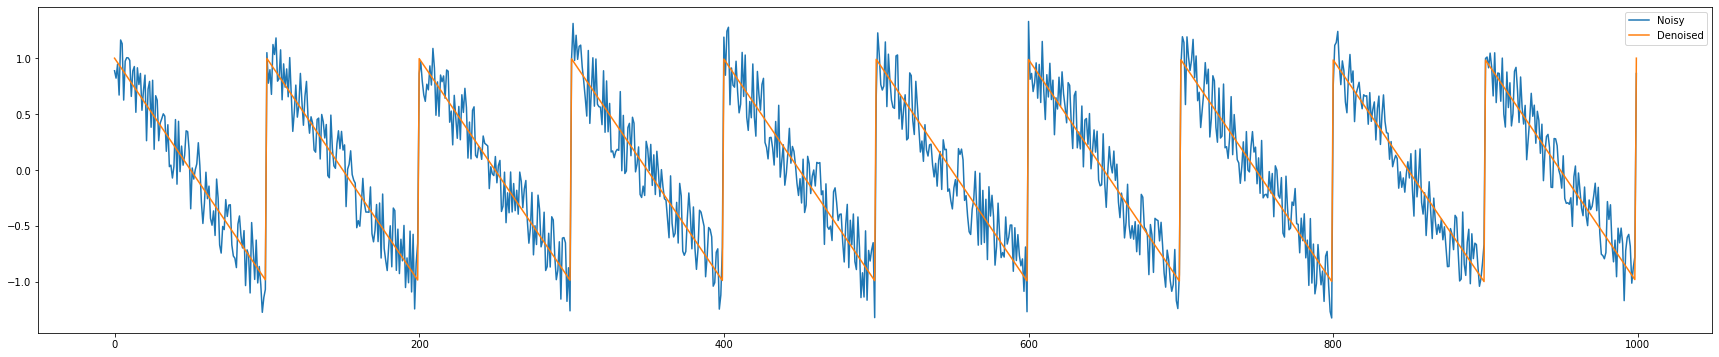

In [137]:
plt.figure(figsize = (30,6))
plt.plot( make_noisy(SAWTOOTH), label='Noisy')
plt.plot(SAWTOOTH, label ='Denoised')
plt.legend()

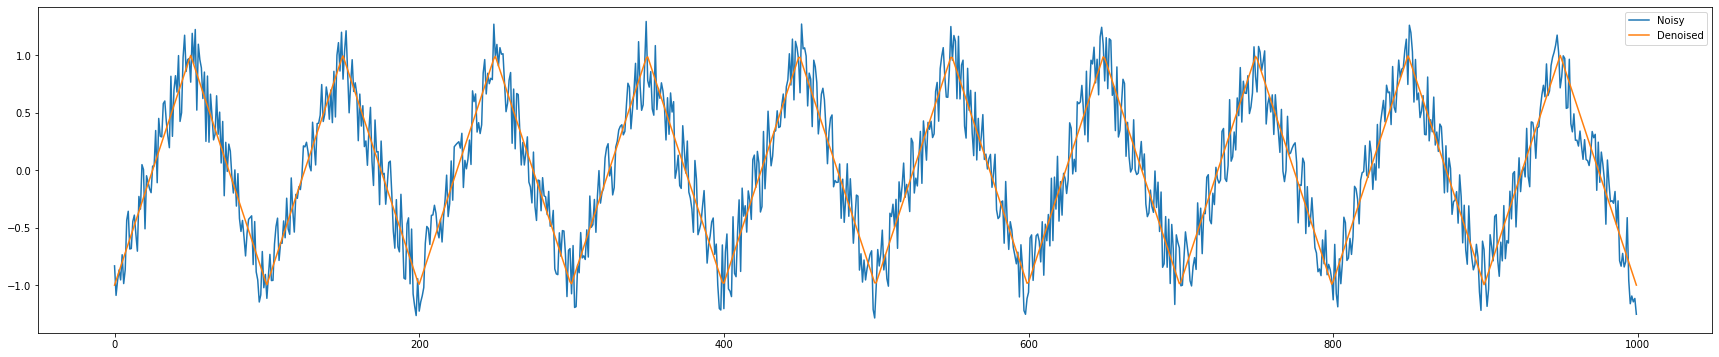

In [144]:
plt.figure(figsize = (30,6))
plt.plot( make_noisy(TRIANGLE), label='Noisy')
plt.plot(TRIANGLE, label ='Denoised')
plt.legend()

In [150]:
import tensorflow as tf

In [ ]:
TRIANGLE_dataset.reshape( 500  , 1000 )

In [177]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.SimpleRNN(30, input_shape= (None ,1000 )))
model.add(tf.keras.layers.Dense(1 , activation = 'tanh'))
# model.compile()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_16 (SimpleRNN)   (None, 30)                30930     
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 30,961
Trainable params: 30,961
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer=tf.keras.optimizers.Adam( learning_rate= 0.01 ),loss=tf.keras.losses.mean_squared_error)
training_history=model.fit(x= TRIANGLE_dataset,y= TRIANGLE_out,epochs=30 ,batch_size=32,validation_data=( TRIANGLE_validation , TRIANGLE_out [:100]) ,verbose=1)


Epoch 1/30


ValueError: ignored